In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.23872729959832 -163.66577204727716
9.083920197040001 95.1275899443063
23.6638464005064 -92.2869325331604
-54.93531063718413 -101.25079809675333
26.706614621257586 6.754163800200558
29.964390844641414 61.71489118238256
83.63665722928044 -2.2418777456019257
0.5238113901226171 -8.554944629769636
39.25227408600071 79.63952840856939
31.861642897691254 -129.81416442218907
-77.51605062907839 -133.44592959373267
23.174372631844676 -85.56668505040481
57.550364032796324 -89.52266670049607
60.363246529077884 77.96501368714155
-84.80432225743093 -39.77551834827614
-36.267081254883465 2.4891929470050513
-42.29302247072162 -152.29358605001258
-8.798394742211755 63.58601372821647
-24.994238178961623 40.63516025782047
12.074798801208118 110.84052874859049
-23.725717453013544 63.02979818364531
56.71020868041714 -67.13010841126366
3.079083363354826 -34.39238906308563
-51.41592750748206 -12.830973157549352
27.08287743701129 -40.92132520239238
42.06615296987084 163.32363836512224
-55.13777316504789 73

-3.465924696812195 -129.41024731283846
-48.87875461728159 -5.959040472150747
80.65992964109509 -20.312097106487215
64.80717033956222 135.72995112872627
-73.5108864013663 -39.323817412236224
23.037089427707954 129.41100046621693
42.382987781168964 44.968499762144944
32.97761276634566 154.99739793487277
-43.66145886218393 52.17807225503677
-82.00455070784776 -8.614451481969354
-13.43308337351121 -47.32014272112545
-24.786964953982846 -32.61100121548154
33.078533689522374 -96.84017973196188
-56.21757152228062 -175.89695340815302
3.168763933333082 -169.31449486530207
-2.177911702564998 -122.90449604221209
-47.781519725397594 -160.974315072271
-61.139131479662055 -32.06007954734571
30.24876166201038 -113.03988948018517
-44.776639154767224 155.72171787121908
-68.99204058969067 91.76684467688926
6.737123249394202 -67.82509970925278
-43.17724739311892 -79.76342482252645
77.22647023297708 -77.49099088387469
-63.66948973868563 -170.9201556734714
22.403060485875756 50.62635773201259
74.0229806985

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | sabang
Processing Record 3 of Set 1 | celestun
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | gat
Processing Record 6 of Set 1 | mirabad
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | harper
Processing Record 9 of Set 1 | aksu
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mantua
Processing Record 13 of Set 1 | sioux lookout
Processing Record 14 of Set 1 | strezhevoy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | toliary
City not found. Skipping...
Processing Record 20 of Set 1 | nha trang
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | s

Processing Record 39 of Set 4 | cobija
Processing Record 40 of Set 4 | biltine
Processing Record 41 of Set 4 | maun
Processing Record 42 of Set 4 | la palma
Processing Record 43 of Set 4 | clonakilty
Processing Record 44 of Set 4 | busselton
Processing Record 45 of Set 4 | hua hin
Processing Record 46 of Set 4 | guerrero
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | troitsko-pechorsk
Processing Record 49 of Set 4 | pasni
Processing Record 50 of Set 4 | estepona
Processing Record 1 of Set 5 | ariquemes
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | vanderhoof
Processing Record 4 of Set 5 | itaituba
Processing Record 5 of Set 5 | eyl
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | myitkyina
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | pskov
Processing Record 11 of Set 5 | breytovo
Processing Record 12 of Set 5 | hamilton
Processing Record 1

Processing Record 32 of Set 8 | ha tinh
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | beloha
Processing Record 35 of Set 8 | nhulunbuy
Processing Record 36 of Set 8 | chokwe
Processing Record 37 of Set 8 | clinton
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | touros
Processing Record 41 of Set 8 | severnyy
Processing Record 42 of Set 8 | tessalit
Processing Record 43 of Set 8 | mackay
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | umm lajj
Processing Record 46 of Set 8 | bosaso
Processing Record 47 of Set 8 | bargal
City not found. Skipping...
Processing Record 48 of Set 8 | mahon
Processing Record 49 of Set 8 | mitsamiouli
Processing Record 50 of Set 8 | nouadhibou
Processing Record 1 of Set 9 | faya
Processing Record 2 of Set 9 | poronaysk
Processing Record 3 of Set 9 | hastings
Processing Record 4 of Set 9 | flin flon
Processing Record 5 of Se

Processing Record 20 of Set 12 | makarov
Processing Record 21 of Set 12 | banjar
Processing Record 22 of Set 12 | dudinka
Processing Record 23 of Set 12 | morgan city
Processing Record 24 of Set 12 | vostok
Processing Record 25 of Set 12 | amarillo
Processing Record 26 of Set 12 | grand centre
City not found. Skipping...
Processing Record 27 of Set 12 | priargunsk
Processing Record 28 of Set 12 | la ronge
Processing Record 29 of Set 12 | turkistan
Processing Record 30 of Set 12 | dmitriyevka
Processing Record 31 of Set 12 | moctezuma
Processing Record 32 of Set 12 | kouroussa
Processing Record 33 of Set 12 | carauari
Processing Record 34 of Set 12 | cassilandia
Processing Record 35 of Set 12 | nassau
Processing Record 36 of Set 12 | port-gentil
Processing Record 37 of Set 12 | andselv
City not found. Skipping...
Processing Record 38 of Set 12 | rio grande
Processing Record 39 of Set 12 | pascagoula
Processing Record 40 of Set 12 | koygorodok
Processing Record 41 of Set 12 | saint-josep

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,74,96,3.44,CK,2022-05-06 04:10:32
1,Sabang,5.8933,95.3214,80.85,81,100,14.76,ID,2022-05-06 04:15:05
2,Celestun,20.8667,-90.4000,84.34,66,16,12.39,MX,2022-05-06 04:15:06
3,Castro,-24.7911,-50.0119,53.20,95,3,2.28,BR,2022-05-06 04:15:07
4,Gat,31.6100,34.7642,63.28,100,73,12.10,IL,2022-05-06 04:15:07
5,Mirabad,30.4362,61.8383,89.85,11,1,3.44,AF,2022-05-06 04:15:08
6,Harper,4.3750,-7.7169,79.63,86,54,2.95,LR,2022-05-06 04:15:09
7,Aksu,41.1231,80.2644,82.87,17,43,2.53,CN,2022-05-06 04:15:09
8,Pacific Grove,36.6177,-121.9166,58.68,82,0,8.05,US,2022-05-06 04:15:10
9,Rikitea,-23.1203,-134.9692,77.99,85,63,16.51,PF,2022-05-06 04:15:11


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [24]:
city_data_df = city_data_df[new_column_order]
city_data_df[new_column_order].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-05-06 04:10:32,-21.2078,-159.7750,82.45,74,96,3.44
1,Sabang,ID,2022-05-06 04:15:05,5.8933,95.3214,80.85,81,100,14.76
2,Celestun,MX,2022-05-06 04:15:06,20.8667,-90.4000,84.34,66,16,12.39
3,Castro,BR,2022-05-06 04:15:07,-24.7911,-50.0119,53.20,95,3,2.28
4,Gat,IL,2022-05-06 04:15:07,31.6100,34.7642,63.28,100,73,12.10
5,Mirabad,AF,2022-05-06 04:15:08,30.4362,61.8383,89.85,11,1,3.44
6,Harper,LR,2022-05-06 04:15:09,4.3750,-7.7169,79.63,86,54,2.95
7,Aksu,CN,2022-05-06 04:15:09,41.1231,80.2644,82.87,17,43,2.53
8,Pacific Grove,US,2022-05-06 04:15:10,36.6177,-121.9166,58.68,82,0,8.05
9,Rikitea,PF,2022-05-06 04:15:11,-23.1203,-134.9692,77.99,85,63,16.51


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

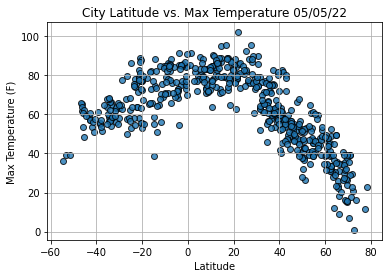

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

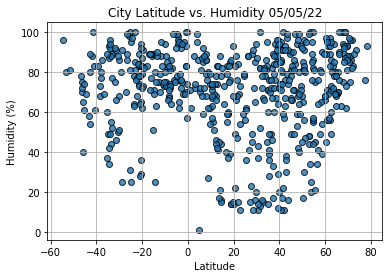

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

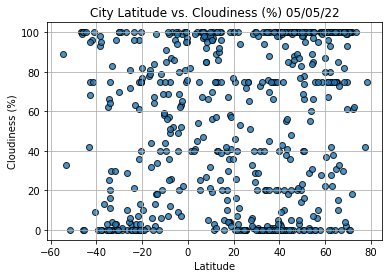

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

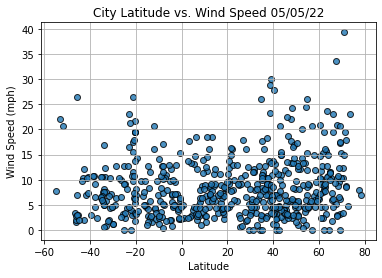

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()